In [2]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import os
import plotly as py

# from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot



In [36]:
########### Define your variables ######

tabtitle = 'Bachelor Degree'
sourceurl = 'https://www.kaggle.com/datasets/tjkyner/bachelor-degree-majors-by-age-sex-and-state'
githublink = 'https://github.com/yibaiyilan/project_8.git'
# here's the list of possible columns to choose from.
list_of_columns =['Bachelor\'s Degree Holders','Science and Engineering','Science and Engineering Related Fields','Business','Education','Arts, Humanities and Others']


########## Set up the chart

df = pd.read_csv('Bachelor_Degree_Majors.csv',encoding='latin1',on_bad_lines='skip')

########## US States to Code
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
df['Code'] = df['State'].map(us_state_to_abbrev)
df=df[df['Age Group']!='25 and older']
df

,State,Sex,Age Group,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others",Code
1,Alabama,Total,25 to 39,"268,924","90,736","32,378","58,515","29,342","57,953",AL
2,Alabama,Total,40 to 64,"418,480","115,762","46,724","112,271","63,875","79,848",AL
3,Alabama,Total,65 and older,"197,953","57,057","19,343","39,361","47,854","34,338",AL
5,Alabama,Male,25 to 39,"117,794","50,188","7,712","29,859","6,357","23,678",AL
6,Alabama,Male,40 to 64,"184,328","67,977","12,331","54,931","12,820","36,269",AL
...,...,...,...,...,...,...,...,...,...,...
606,Wyoming,Male,40 to 64,"24,149","11,145","1,230","5,077","2,700","3,997",WY
607,Wyoming,Male,65 and older,"16,482","9,375","1,145","2,011","2,378","1,573",WY
609,Wyoming,Female,25 to 39,"18,180","6,708","2,268","1,936","3,313","3,955",WY
610,Wyoming,Female,40 to 64,"26,537","5,110","4,194","3,827","8,007","5,399",WY


In [4]:
varname = 'Bachelor\'s Degree Holders'
mycolorbartitle = "Bachelor Degree Holders"
mygraphtitle = f'Female Rate for Bachelor Degree of {varname} in 2019'
mycolorscale = 'Sunset' # Note: The error message will list possible color scales.




In [5]:
major = pd.DataFrame(df,columns = ['Code','Sex',varname])
major[varname] = major[varname].replace(",","", regex=True).astype(float)
major

,Code,Sex,Bachelor's Degree Holders
1,AL,Total,268924.0
2,AL,Total,418480.0
3,AL,Total,197953.0
5,AL,Male,117794.0
6,AL,Male,184328.0
...,...,...,...
606,WY,Male,24149.0
607,WY,Male,16482.0
609,WY,Female,18180.0
610,WY,Female,26537.0


In [14]:
total = major[major['Sex']=='Total'].groupby(['Code'],as_index = False).sum().rename(columns={varname:"Total"})
female = major[major['Sex']=='Female'].groupby(['Code'],as_index = False).sum().rename(columns={varname:"Female"})
male = major[major['Sex']=='Female'].groupby(['Code'],as_index = False).sum().rename(columns={varname:"Male"})
female_rate = pd.DataFrame()
female_rate['Code']  = df['State'].map(us_state_to_abbrev)
female_rate = pd.merge(female,male,on=['Code']).merge(total,on=['Code'])
female_rate['Female Rate'] = female_rate['Female']/female_rate['Total']
female_rate

,Code,Female,Male,Total,Female Rate
0,AK,80337.0,80337.0,146157.0,0.549662
1,AL,479739.0,479739.0,885357.0,0.541859
2,AR,260083.0,260083.0,475367.0,0.547120
3,AZ,768069.0,768069.0,1492158.0,0.514737
4,CA,4868520.0,4868520.0,9428484.0,0.516363
5,CO,866670.0,866670.0,1695602.0,0.511128
6,CT,527498.0,527498.0,994548.0,0.530390
7,DC,157755.0,157755.0,301429.0,0.523357
8,DE,121955.0,121955.0,228199.0,0.534424
9,FL,2485802.0,2485802.0,4753637.0,0.522926


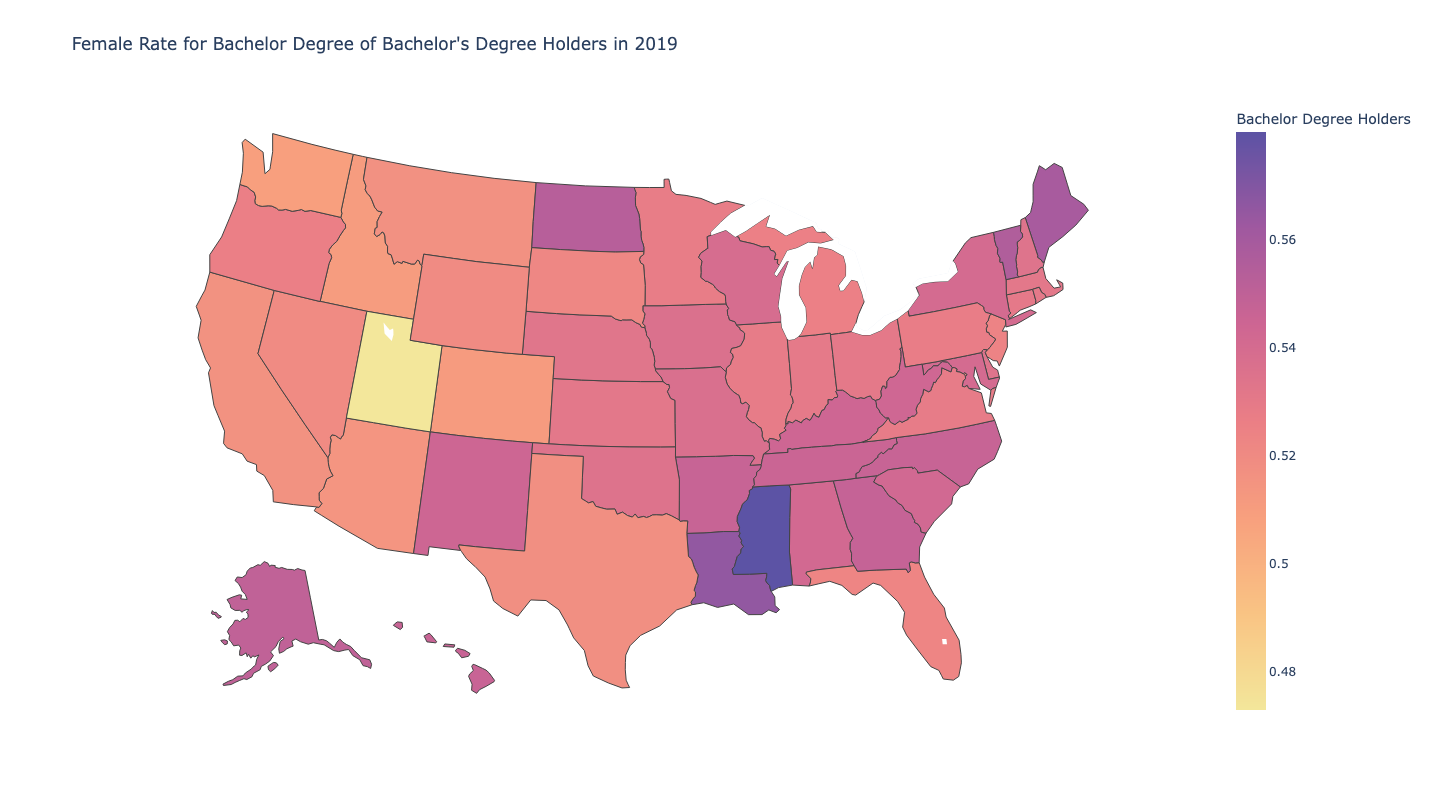

In [16]:
data1=go.Choropleth(
    locations=female_rate['Code'], # Spatial coordinates
    locationmode = 'USA-states', # set of locations match entries in `locations`
    z = female_rate['Female Rate'].astype(float), # Data to be color-coded
    colorscale = mycolorscale,
    colorbar_title = mycolorbartitle,
)
fig1 = go.Figure(data1)
fig1.update_layout(
    title_text = mygraphtitle,
    geo_scope='usa',
    width=1200,
    height=800
)
fig1

In [41]:
data2 = df[['Code','Sex',varname]]
data2[varname] = data2[varname].replace(",","", regex=True).astype(float)
data2 = data2[data2['Sex']!='Total'].groupby(['Code','Sex'],as_index = False).sum()
data2

/tmp/ipykernel_159/3258550195.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Code,Sex,Bachelor's Degree Holders
0,AK,Female,80337.0
1,AK,Male,65820.0
2,AL,Female,479739.0
3,AL,Male,405618.0
4,AR,Female,260083.0
...,...,...,...
97,WI,Male,579921.0
98,WV,Female,146635.0
99,WV,Male,123071.0
100,WY,Female,59074.0


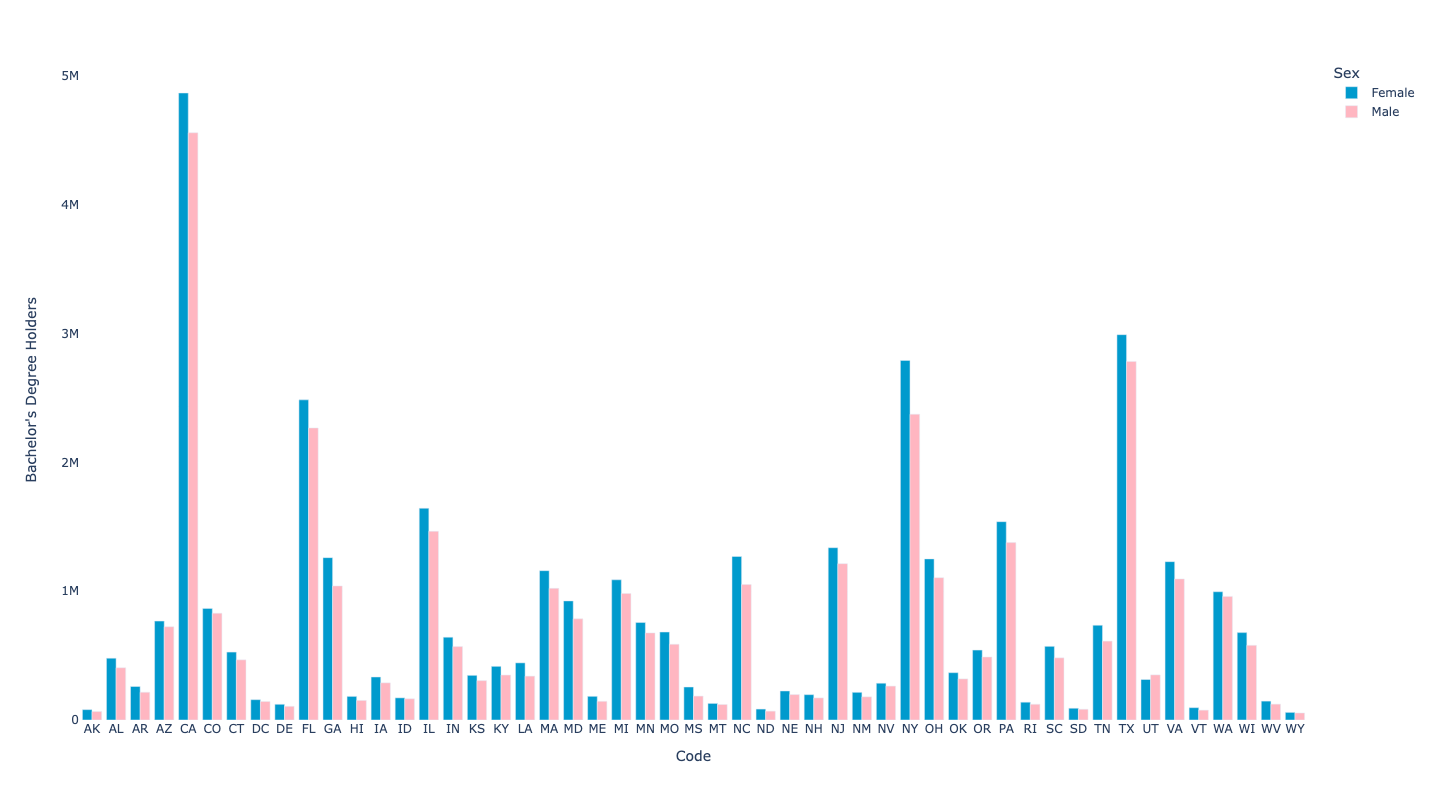

In [48]:
color_discrete_sequence = ['#009ACD','#FFB6C1']
fig2 = px.bar(data2, x="Code", y=varname, 
             color="Sex", barmode="group",color_discrete_sequence=color_discrete_sequence)
fig2.update_layout(
    width=1200,
    height=800,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)
fig2